## Introduction

LCU is an useful technique that allows to perform quantum trasformation not only unitary but as the form of linear combination of unitaries
$$
T = \sum_{i=0}^{K-1} \alpha_i U_i \ket{\psi} 
$$
where $\alpha_i$ is positive real number (the negative and imaginary phase can be absorbed into the unitary $U_i$). For simplicity, we assume $K=2^{m}$ (if not we add more ancilla qubits to satify this condition)

We will briefly discribe how to implement this transformation using LCU circuit. Consider two oracles:
$$
P: \ket{0}^{\otimes m} \longrightarrow \frac{1}{|\alpha|_1}\sum_{i}\sqrt{\alpha_i}\ket{i},
$$

$$
S := \sum_{i \in [K]} \ket{i}\bra{i}\otimes U_i,
$$
The operation $W = (P^{\dagger}\otimes I_n)S(P\otimes I_n)$ will transform a $n$-qubit state $\ket{\psi}$ as:

$$
W\ket{\psi} = \frac{1}{|\alpha|_1}\ket{0}^{\otimes m} T \ket{\psi} + \ket{\omega},
$$
where $\ket{\omega}$ is an unormalized state and othorgonal to $\ket{0}^{\otimes m}$.

### Example of linear combination of two unitaries
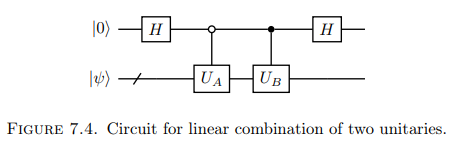


## LCU_Cirq

This tutorial will teach how to use our LCU package for your Cirq code. It will briefly introduce our functionalites,
the appropriated forms of input and the expected output through various examples.

The first part is how to construct the LCU circuit.

Here, we present an example of linear combination of two unitaries as:
$$
T = 0.7 X + 0.5 Y,
$$ 
where $X, Y$ are respectively Pauli-X and Pauli-Y matrices.

Given $T$, we set $m=1$, $n=1$. For simplicity we assume the system initialized with $\ket{\psi_0}=\ket{0}$. Therefore the transformation of $W$ will output:
$$
\ket{\psi_{lcu}} = \frac{1}{1.2}\ket{0}\otimes(0.7+0.5i)\ket{1} + \ket{\omega}
$$
$$
\ket{\psi_{lcu}} = \ket{0}\otimes(0.5833+0.4167i)\ket{1} + \ket{\omega}
$$

In [1]:
# Import Package
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from lcu_cirq.lcu import LCU
import numpy as np
import cirq
from cirq.contrib.svg import SVGCircuit

In [2]:
# Define coefficients and unitaries
coefficients = [0.7, 0.5]
unitaries = [np.array([[0,1],[1,0]]), np.array([[0,-1j],[1j,0]])]

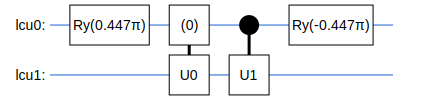

In [3]:
# Construct LCU circuit
circuit = LCU(coefficients=coefficients, unitaries=unitaries)
circuit.visualise()

In [4]:
# Simulate
simulator = cirq.Simulator()
result = simulator.simulate(circuit, qubit_order=circuit.qubits)

# Readout final state vector and choose the output such that 
# the coefficient qubit equal 0
final_state_vector = result.final_state_vector
output_state = final_state_vector[0:2]
output_state

array([0.       +0.j        , 0.5833333+0.41666663j], dtype=complex64)

The result matches the expected output.

We further allow users to input arbitrary initialized state by integrating our LCU circuit with your own circuit.

Assume, we initalized a system with $1$ qubit, and perform a Hadamard gate to the system. Now we add LCU circuit of the qubit (note that the orginal system is $1$ but we still one ancilla qubit to encoding the coefficients).

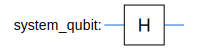

In [5]:
# Define qubit
qubit = cirq.NamedQubit("system_qubit")

# Define an empty circuit 
circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))

SVGCircuit(circuit)

Now we add the LCU circuit to the original circuit.
We use the `on_qubits` varible to specify the system qubit that LCU acts on.

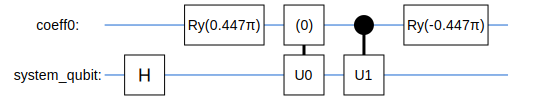

In [6]:
circuit.append(LCU(coefficients=coefficients, unitaries=unitaries, on_qubits=[qubit]))
SVGCircuit(circuit)

Under this case, the expected output will be:
$$
\ket{\psi_{lcu}} = \frac{1}{1.2}\ket{0}\otimes(0.7X+0.5Y)\ket{+} + \ket{\omega}
$$
$$
\ket{\psi_{lcu}} = \ket{0}\otimes(\frac{1}{1.2\sqrt{2}}((0.7-0.5i)\ket{0}+(0.7+0.5i)\ket{1}) ) + \ket{\omega}
$$
$$
\ket{\psi_{lcu}} = \ket{0}\otimes(((0.412-0.295i)\ket{0}+(0.412+0.295i)\ket{1}) ) + \ket{\omega}
$$

In [7]:
circuit.all_qubits()

frozenset({cirq.NamedQubit('coeff0'), cirq.NamedQubit('system_qubit')})

In [8]:
# Simulate
simulator = cirq.Simulator()
result = simulator.simulate(circuit, qubit_order=circuit.all_qubits())

# Readout final state vector and choose the output such that 
# the coefficient qubit equal 0
final_state_vector = result.final_state_vector
output_state = final_state_vector[0:2]
output_state

array([0.41247892-0.29462782j, 0.41247892+0.29462782j], dtype=complex64)

We still output the correct answers